In [1]:
import pandas as pd
import numpy as np
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
import seaborn as sns

In [2]:
df = pd.read_csv('econ_fares.csv')

In [3]:
# df.head(1000).to_csv('econ_fares_1000.csv')

In [4]:
# df = df.drop(['id','lati_source_city', 'long_source_city', 'lati_destination', 'long_destination'], axis=1)

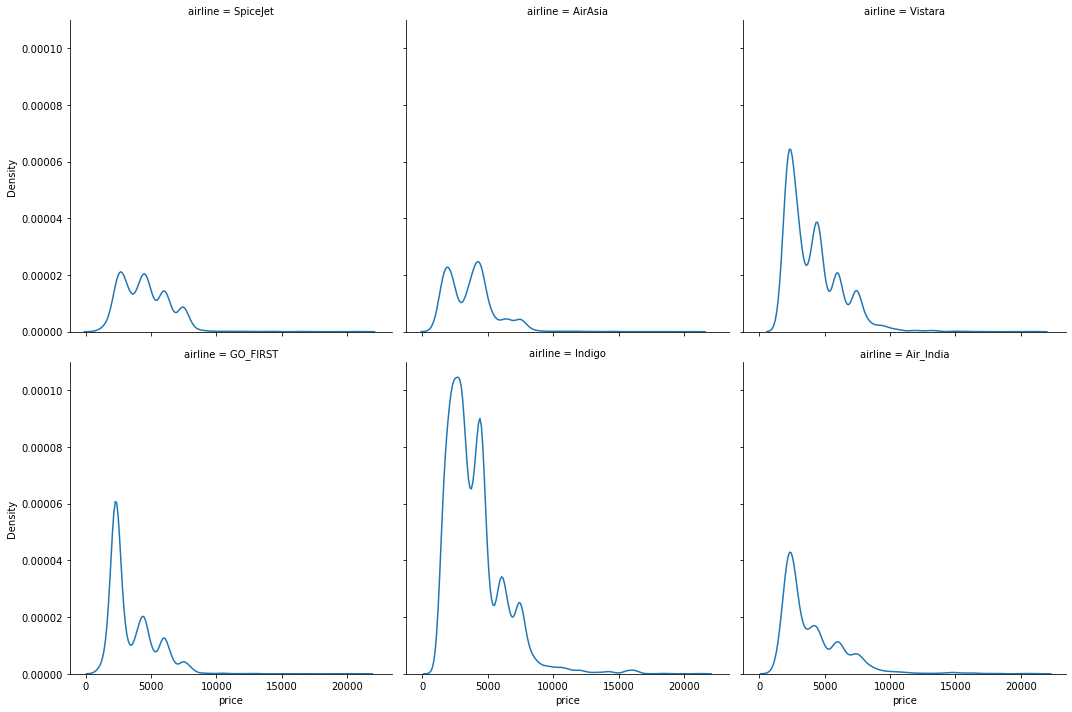

In [5]:
sns.displot(data=df, kind='kde', x='price', col='airline', col_wrap=3)

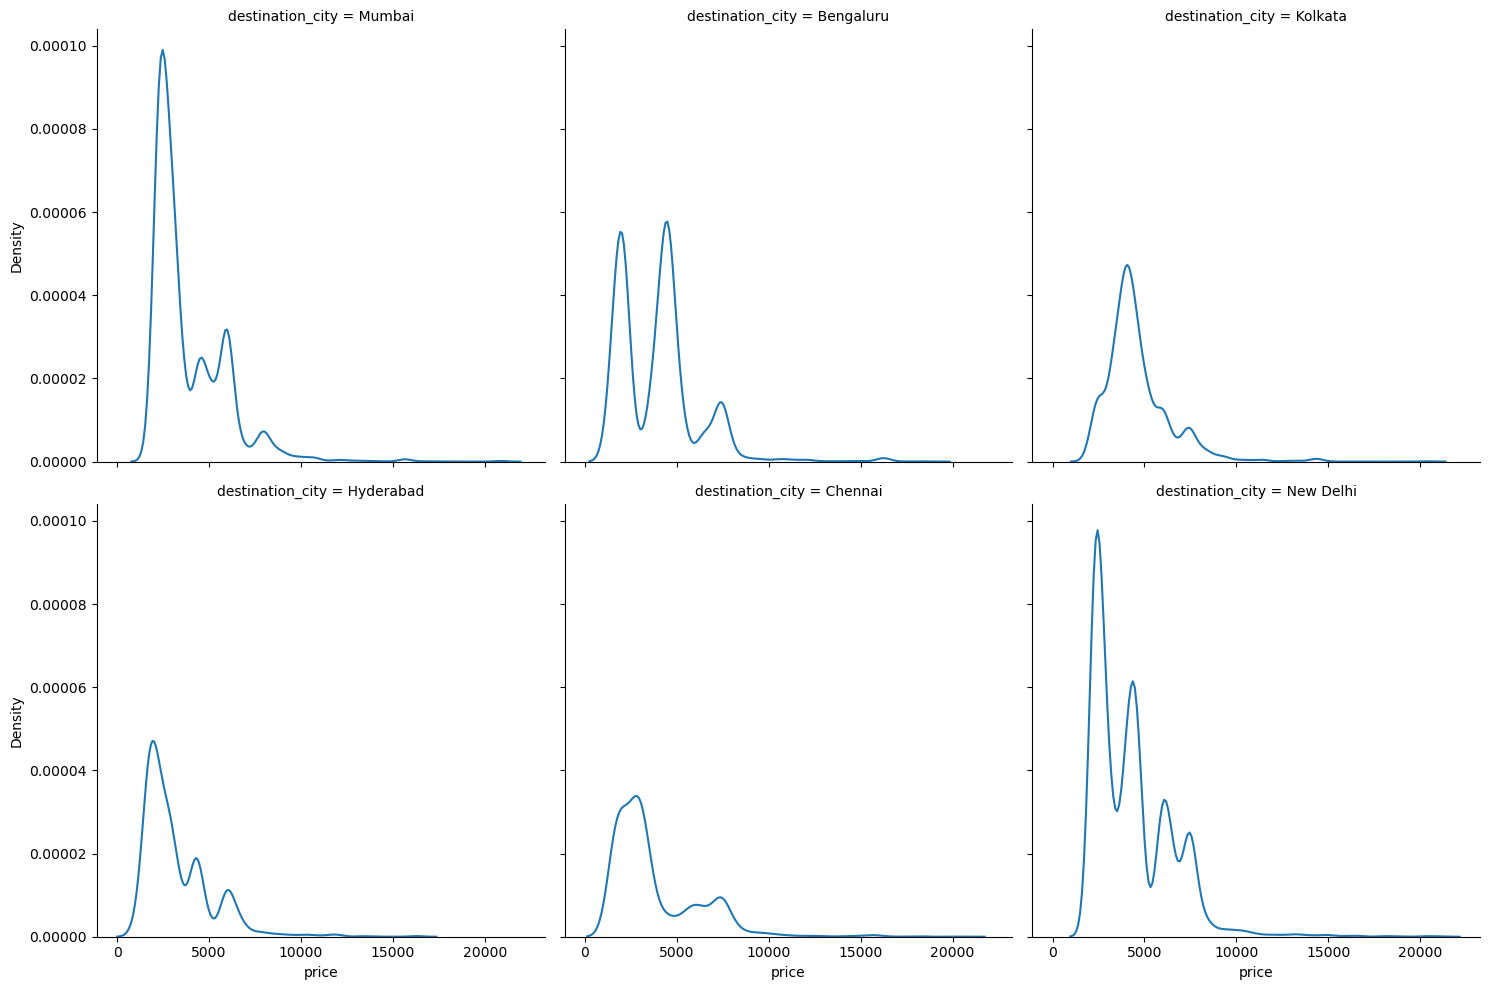

In [23]:
sns.displot(data=df, kind='kde', x='price', col='destination_city', col_wrap=3)

In [6]:
df['carrier_category'] = df['airline'].apply(lambda x: 'full_service' if x in ['Vistara', 'Air India'] else 'low_cost')

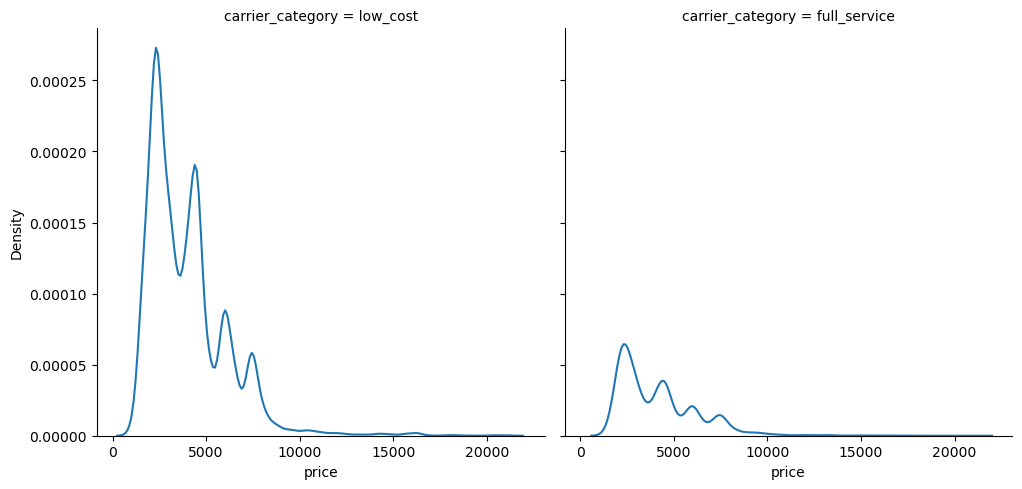

In [7]:
plt = sns.displot(data=df, kind='kde', x='price', col='carrier_category', col_wrap=3)

# plt.savefig('carrier_category.png',transparent=True)

In [8]:
# df.to_csv('price.csv', index=False)

In [9]:
df.head(3)

,airline,source_city,departure_time,stops,arrival_time,destination_city,distance,class,duration,days_left,price,origin_airport_capacity,arrival_airport_capacity,origin_GDP,des_GDP,carrier_category,od_pair
0,SpiceJet,New Delhi,Evening,zero,Night,Mumbai,1160.540574,Economy,2.17,1,5953,39339998,21747892,598922,224309,low_cost,New Delhi-Mumbai
1,SpiceJet,New Delhi,Early_Morning,zero,Morning,Mumbai,1160.540574,Economy,2.33,1,5953,39339998,21747892,598922,224309,low_cost,New Delhi-Mumbai
2,AirAsia,New Delhi,Early_Morning,zero,Early_Morning,Mumbai,1160.540574,Economy,2.17,1,5956,39339998,21747892,598922,224309,low_cost,New Delhi-Mumbai


In [10]:
df['des_GDP'] = df['des_GDP'].apply(lambda x: str(x).replace(',',''))
df['des_GDP'] = df['des_GDP'].astype('float')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27902 entries, 0 to 27901
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   airline                   27902 non-null  object 
 1   source_city               27902 non-null  object 
 2   departure_time            27902 non-null  object 
 3   stops                     27902 non-null  object 
 4   arrival_time              27902 non-null  object 
 5   destination_city          27902 non-null  object 
 6   distance                  27902 non-null  float64
 7   class                     27902 non-null  object 
 8   duration                  27902 non-null  float64
 9   days_left                 27902 non-null  int64  
 10  price                     27902 non-null  int64  
 11  origin_airport_capacity   27902 non-null  int64  
 12  arrival_airport_capacity  27902 non-null  int64  
 13  origin_GDP                27902 non-null  int64  
 14  des_GD

In [12]:
# df.to_csv('econ_fares.csv', index=False)

<AxesSubplot:>

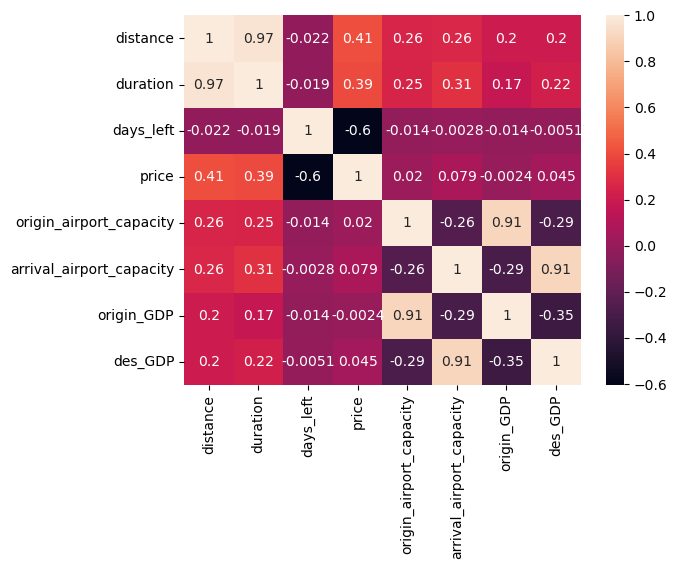

In [13]:
# corrplot

sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

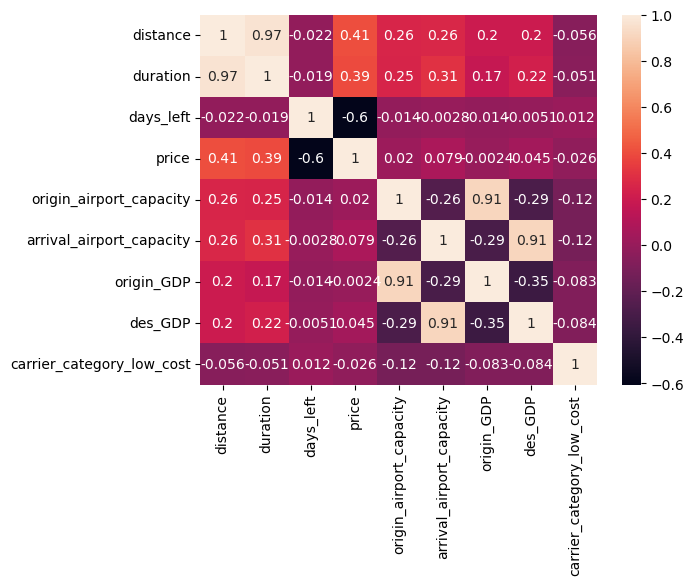

In [14]:
# half the heatmap
sns.heatmap(pd.get_dummies(df, columns=['stops', 'carrier_category'], drop_first=True).corr(), annot=True)



In [15]:
# only get dummies for stops column in df

pd.get_dummies(df, columns=['stops'], drop_first=True)


,airline,source_city,departure_time,arrival_time,destination_city,distance,class,duration,days_left,price,origin_airport_capacity,arrival_airport_capacity,origin_GDP,des_GDP,carrier_category,od_pair
0,SpiceJet,New Delhi,Evening,Night,Mumbai,1160.540574,Economy,2.17,1,5953,39339998,21747892,598922,224309.0,low_cost,New Delhi-Mumbai
1,SpiceJet,New Delhi,Early_Morning,Morning,Mumbai,1160.540574,Economy,2.33,1,5953,39339998,21747892,598922,224309.0,low_cost,New Delhi-Mumbai
2,AirAsia,New Delhi,Early_Morning,Early_Morning,Mumbai,1160.540574,Economy,2.17,1,5956,39339998,21747892,598922,224309.0,low_cost,New Delhi-Mumbai
3,Vistara,New Delhi,Morning,Afternoon,Mumbai,1160.540574,Economy,2.25,1,5955,39339998,21747892,598922,224309.0,full_service,New Delhi-Mumbai
4,Vistara,New Delhi,Morning,Morning,Mumbai,1160.540574,Economy,2.33,1,5955,39339998,21747892,598922,224309.0,full_service,New Delhi-Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27897,Indigo,Chennai,Night,Night,Hyderabad,511.375514,Economy,1.25,49,1551,9533301,12429796,241130,305389.0,low_cost,Chennai-Hyderabad
27898,Indigo,Chennai,Evening,Evening,Hyderabad,511.375514,Economy,1.33,49,1551,9533301,12429796,241130,305389.0,low_cost,Chennai-Hyderabad
27899,Indigo,Chennai,Evening,Evening,Hyderabad,511.375514,Economy,1.33,49,1551,9533301,12429796,241130,305389.0,low_cost,Chennai-Hyderabad
27900,Indigo,Chennai,Evening,Night,Hyderabad,511.375514,Economy,1.33,49,1551,9533301,12429796,241130,305389.0,low_cost,Chennai-Hyderabad


In [16]:
df['od_pair'] = df['source_city'].astype(str) + '-' + df['destination_city'].astype(str)

In [17]:
df.head(3)

,airline,source_city,departure_time,stops,arrival_time,destination_city,distance,class,duration,days_left,price,origin_airport_capacity,arrival_airport_capacity,origin_GDP,des_GDP,carrier_category,od_pair
0,SpiceJet,New Delhi,Evening,zero,Night,Mumbai,1160.540574,Economy,2.17,1,5953,39339998,21747892,598922,224309.0,low_cost,New Delhi-Mumbai
1,SpiceJet,New Delhi,Early_Morning,zero,Morning,Mumbai,1160.540574,Economy,2.33,1,5953,39339998,21747892,598922,224309.0,low_cost,New Delhi-Mumbai
2,AirAsia,New Delhi,Early_Morning,zero,Early_Morning,Mumbai,1160.540574,Economy,2.17,1,5956,39339998,21747892,598922,224309.0,low_cost,New Delhi-Mumbai


In [18]:
df.isnull().sum()

airline                     0
source_city                 0
departure_time              0
stops                       0
arrival_time                0
destination_city            0
distance                    0
class                       0
duration                    0
days_left                   0
price                       0
origin_airport_capacity     0
arrival_airport_capacity    0
origin_GDP                  0
des_GDP                     0
carrier_category            0
od_pair                     0
dtype: int64

In [19]:
df = df[df['stops'] == 'zero']

In [20]:
df.head(3)

,airline,source_city,departure_time,stops,arrival_time,destination_city,distance,class,duration,days_left,price,origin_airport_capacity,arrival_airport_capacity,origin_GDP,des_GDP,carrier_category,od_pair
0,SpiceJet,New Delhi,Evening,zero,Night,Mumbai,1160.540574,Economy,2.17,1,5953,39339998,21747892,598922,224309.0,low_cost,New Delhi-Mumbai
1,SpiceJet,New Delhi,Early_Morning,zero,Morning,Mumbai,1160.540574,Economy,2.33,1,5953,39339998,21747892,598922,224309.0,low_cost,New Delhi-Mumbai
2,AirAsia,New Delhi,Early_Morning,zero,Early_Morning,Mumbai,1160.540574,Economy,2.17,1,5956,39339998,21747892,598922,224309.0,low_cost,New Delhi-Mumbai


In [21]:
df.to_csv('econ_fares.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'econ_fares.csv'